Holder Function 
=====================


In [1]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging
using StaticArrays

  Activating project at `~/globtim`


We define the center and range of the square domain of approximation. 

In [2]:
# Constants and Parameters
const n, a, b = 2, 10, 1
const scale_factor = a / b
f = HolderTable # Objective function
d = 19 # Initial Degree 
SMPL = 120   
println("Number of samples: ", SMPL^2)
TR = test_input(f, 
                dim = n,
                center = [0.0, 0.0],
                GN = SMPL, 
                sample_range = scale_factor
                )

Number of samples: 14400


test_input(2, [0.0, 0.0], 120, (0.1, 0.5), 0.002, (0.0, 0.0), 10.0, 1.0, 6, Globtim.HolderTable)

The `Constructor` function computes the coefficients of the polynomial approximant in the basis specified, with `GN^2` samples distributed following the measure with respect to which the polynomial basis is orthogonal.
The `RationalPrecision` specifies that the conversion of the polynomial's coefficients from the tensorized orthogonal basis to the standard monomial basis is carried out in high precision. 

In [3]:
pol_cheb = Constructor(TR, d, basis=:chebyshev, precision=RationalPrecision)
pol_lege = Constructor(TR, d, basis=:legendre, precision=RationalPrecision, normalized=true);

current L2-norm: 1.9189420462012121
current L2-norm: 1.8955846302790715


Note that with the `Legendre` polynomials, it is necessary to run with the `normalized` option to ensure that the polynomials are orthonormal with respect to the uniform measure on the domain of approximation.

In [4]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=pol_cheb.normalized,
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=pol_lege.normalized)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR);

Tracking 324 paths...   1%|▏                            |  ETA: 0:09:40



Tracking 324 paths... 100%|█████████████████████████████| Time: 0:00:03
  # paths tracked:                  324
  # non-singular solutions (real):  289 (189)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         289 (189)
Tracking 324 paths...   1%|▏                            |  ETA: 0:03:48



Tracking 324 paths... 100%|█████████████████████████████| Time: 0:00:01
  # paths tracked:                  324
  # non-singular solutions (real):  289 (173)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         289 (173)


In [5]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=.5);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=.5);

Processing point 1 of 189
Optimization has converged within bounds: ✓
Processing point 2 of 189
Optimization has converged within bounds: ✓
Processing point 3 of 189
Optimization has converged within bounds: ✓
Processing point 4 of 189
Optimization has converged within bounds: ✓
Processing point 5 of 189
Optimization has converged within bounds: ✓
Processing point 6 of 189
Optimization has converged within bounds: ✓
Processing point 7 of 189
Optimization has converged within bounds: ✓
Processing point 8 of 189
Optimization has converged within bounds: ✓
Processing point 9 of 189
Optimization has converged within bounds: ✓
Processing point 10 of 189
Optimization has converged within bounds: ✓
Processing point 11 of 189
Optimization status: ✗ (did not converge)
Processing point 12 of 189
Optimization has converged within bounds: ✓
Processing point 13 of 189
Optimization has converged within bounds: ✓
Processing point 14 of 189
Optimization has converged within bounds: ✓
Processing point 

┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches /Users/ghscholt/.julia/packages/LineSearches/jgnxK/src/hagerzhang.jl:155


Optimization status: ✗ (outside bounds)
Processing point 16 of 189
Optimization has converged within bounds: ✓
Processing point 17 of 189
Optimization has converged within bounds: ✓
Processing point 18 of 189
Optimization status: ✗ (did not converge)
Processing point 19 of 189
Optimization has converged within bounds: ✓
Processing point 20 of 189
Optimization has converged within bounds: ✓
Processing point 21 of 189
Optimization status: ✗ (outside bounds)
Processing point 22 of 189
Optimization status: ✗ (did not converge)
Processing point 23 of 189
Optimization has converged within bounds: ✓
Processing point 24 of 189
Optimization status: ✗ (did not converge)
Processing point 25 of 189
Optimization has converged within bounds: ✓
Processing point 26 of 189
Optimization has converged within bounds: ✓
Processing point 27 of 189
Optimization has converged within bounds: ✓
Processing point 28 of 189
Optimization has converged within bounds: ✓
Processing point 29 of 189
Optimization has con

┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches /Users/ghscholt/.julia/packages/LineSearches/jgnxK/src/hagerzhang.jl:155
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches /Users/ghscholt/.julia/packages/LineSearches/jgnxK/src/hagerzhang.jl:155
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches /Users/ghscholt/.julia/packages/LineSearches/jgnxK/src/hagerzhang.jl:155
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches /Users/ghscholt/.julia/packages/LineSearches/jgnxK/src/hagerzhang.jl:155
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches /Users/ghscholt/.julia/packages/LineSearches/jgnxK/src/hagerzhang.jl:155
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches /Users/ghscholt/.julia/packages/LineSearches/jgnxK/src/hagerzhang.jl:155
┌ Warning: Failed to achieve

In [6]:
using CairoMakie
CairoMakie.activate!

activate! (generic function with 1 method)

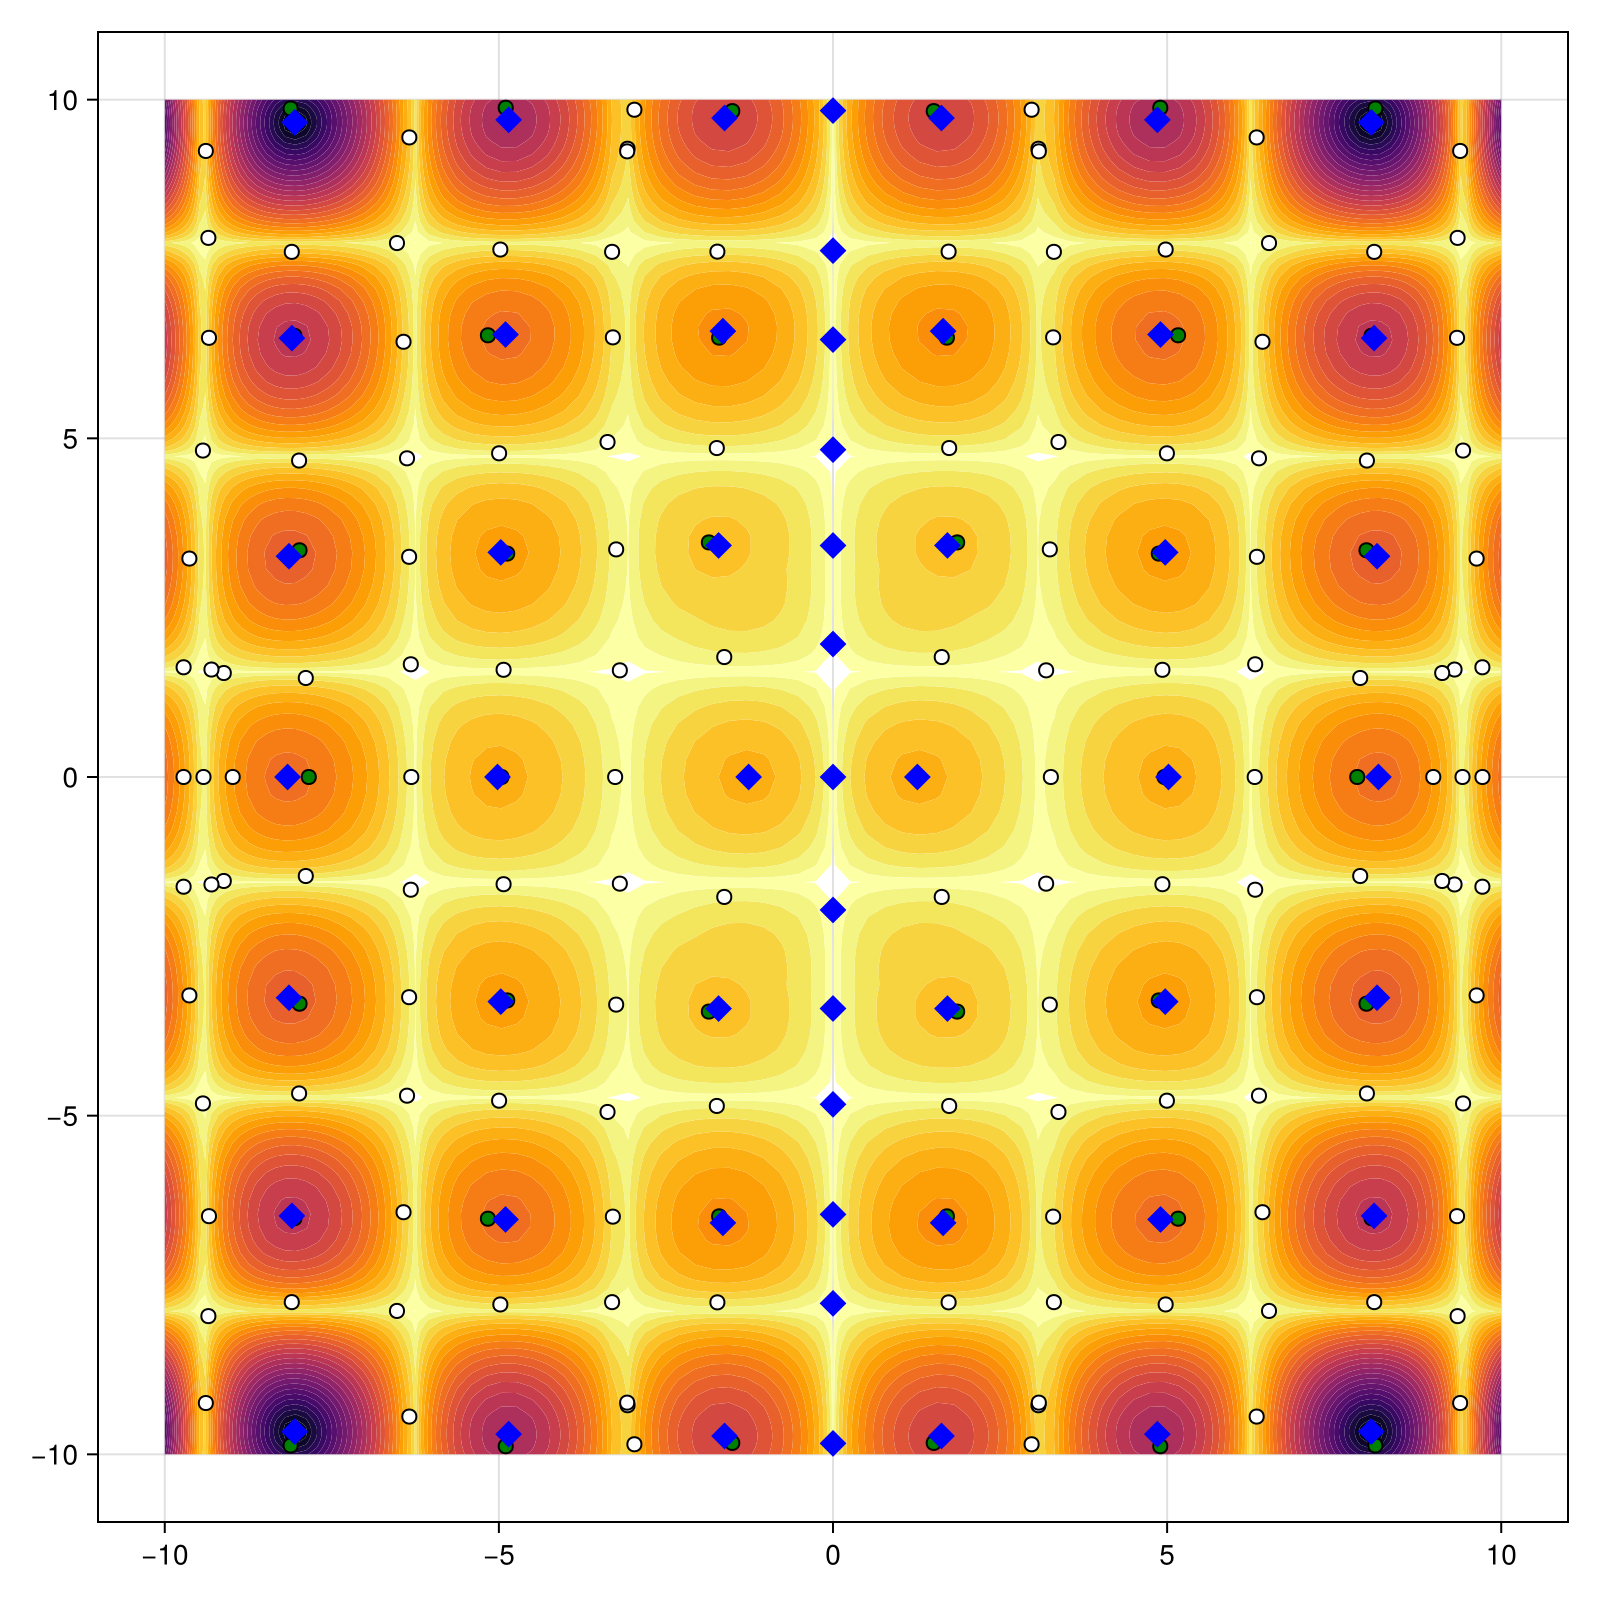

In [7]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size = (800, 800))
# display(fig_1)
# save("Holder_table_cheb_19_level_set.pdf", fig_1)

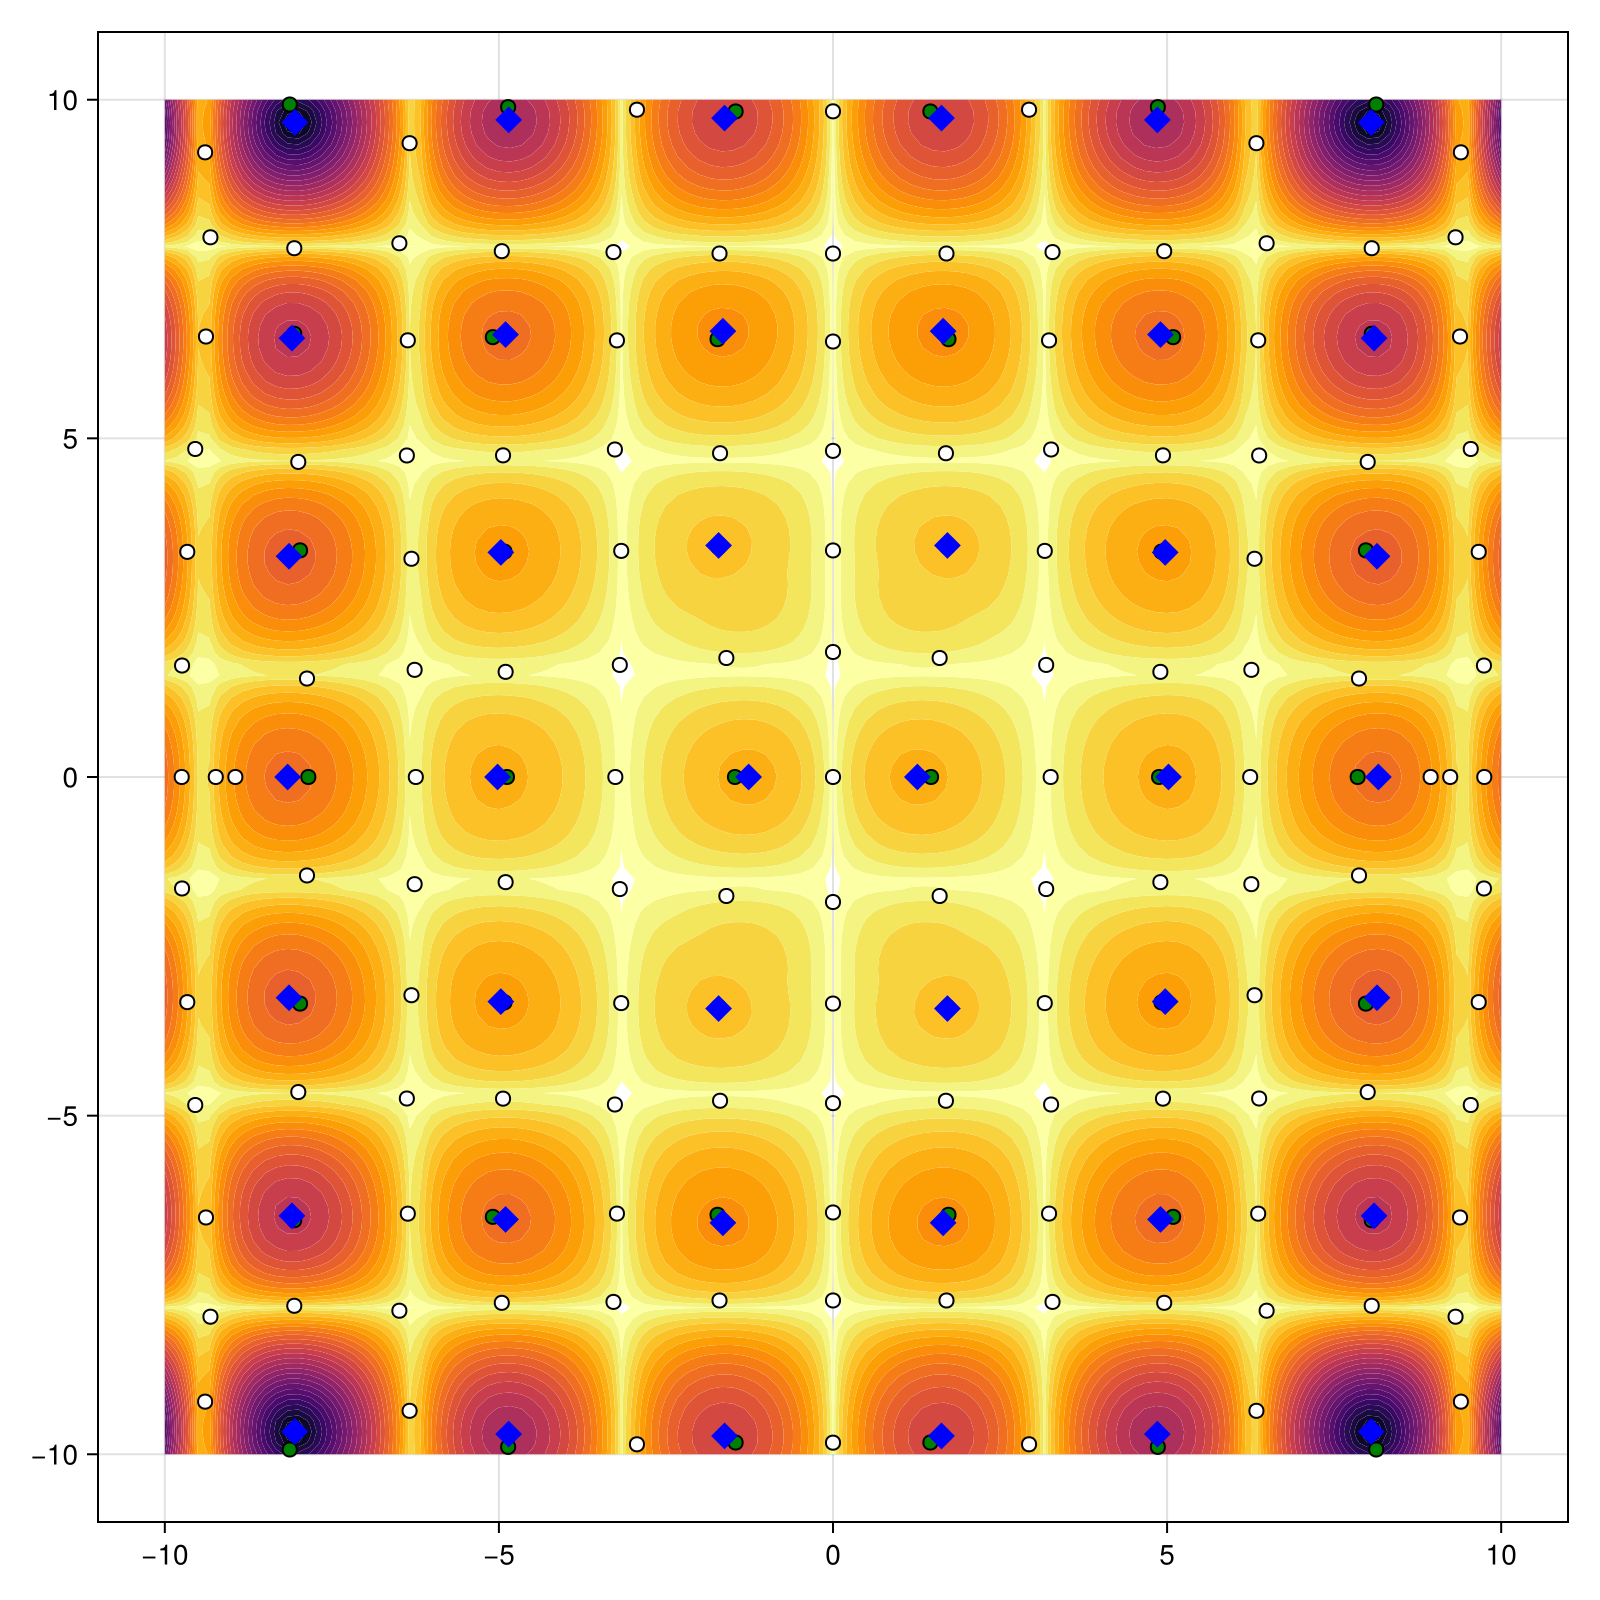

In [8]:
fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true, figure_size = (800, 800))
# display(fig_2)
# save("Holder_table_lege_26_level_set.pdf", fig_2)

In [9]:
using GLMakie
GLMakie.activate!

┌ Warning: Error requiring `GLMakie` from `Globtim`
│   exception = (LoadError("/Users/ghscholt/globtim/src/LevelSetViz.jl", 3, ArgumentError("Package Globtim does not have Colors in its dependencies:\n- You may have a partially installed environment. Try `Pkg.instantiate()`\n  to ensure all packages in the environment are installed.\n- Or, if you have Globtim checked out for development and have\n  added Colors as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with Globtim")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x000000011976daaf, Ptr{Nothing} @0x000000011976dce7, Ptr{Nothing} @0x0000000104c8a7ff, Ptr{Nothing} @0x0000000118fa0783, Ptr{Nothing} @0x0000000118fa07ff, Ptr{Nothing} @0x0000000104cb227b, Ptr{Nothing} @0x0000000104cb1297, Ptr{Nothing} @0x0000000104cb198f, Ptr{Nothing} @0x0000000104cb2923, Ptr{Nothing} @0x00000001193eb61f, Ptr{Nothing} @0x00000003699d03ef, Ptr{No

activate! (generic function with 1 method)

In [14]:
fig_3d = plot_polyapprox_3d(
    pol_lege, 
    TR, 
    df_lege, 
    df_min_lege, 
    figure_size = (1600, 1600), 
    fade=true,
    z_cut=0.1
)
# display(fig_3d)

In [11]:
# save("Holder_table_cheb_19_3d.png", fig_3d)